In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

#getting csvs
song_data = pd.read_csv("song_data.csv")
song_info = pd.read_csv("song_info.csv")

In [14]:
#merge data
total_data = pd.merge(song_data, song_info, left_index=True, right_index=True)
total_data.head()
#total_data["song_name"].value_counts()

,song_name_x,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_name_y,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [6]:
#basic cleaning of the merged dataframe
new_data = total_data.drop("album_names",1)
new_data = new_data.drop("playlist",1)
new_data = new_data.drop("song_name_y",1)
new_data = new_data.rename(columns={"song_name_x":"song_name"})
new_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Green Day
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Linkin Park
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Red Hot Chili Peppers
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Nickelback


In [31]:
# remove duplicates from song_data
b = pd.DataFrame(new_data)
b_clean = DataFrame.drop_duplicates(b)
b_clean.sort_values("song_popularity")
b_clean.head()
len(b_clean)

14926

In [30]:
maxval = max(b_clean.song_popularity)
minval = min(b_clean.song_popularity)
meanval = sum(b_clean.song_popularity)/len(b_clean.song_popularity)
lenval = len(b_clean.song_popularity)


popdeciles = pd.DataFrame(b_clean.groupby(pd.qcut(b_clean.song_popularity,10))["song_popularity"].mean())
durdeciles = pd.DataFrame(b_clean.groupby(pd.qcut(b_clean.song_duration_ms,10))["song_duration_ms"].mean())
durdeciles
#plt.bar(durde,durdeciles)

,song_duration_ms
song_duration_ms,
"(11999.999, 157933.0]",132620.807898
"(157933.0, 176538.0]",167750.223190
"(176538.0, 190185.5]",183759.254692
"(190185.5, 201361.0]",195867.344943
"(201361.0, 211845.5]",206754.229223
"(211845.5, 222533.0]",216998.895512
"(222533.0, 236000.0]",229173.472204
"(236000.0, 254805.0]",244897.086461
"(254805.0, 285949.5]",268584.587131


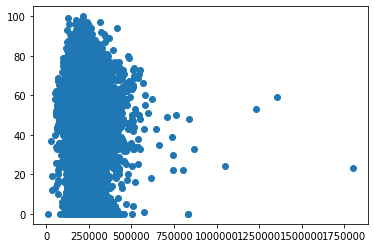

In [43]:
plt.scatter(b_clean.song_duration_ms,b_clean.song_popularity)

means = []

for header in b_clean:
    